In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('fakenews_train.csv')

In [4]:
df.head(5)

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [5]:
df.shape

(20800, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
#features = df.iloc[:, 10].values

labels=df["label"].values
features=df["text"]

In [8]:
labels

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [9]:
features

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
5        In these trying times, Jackie Mason is the Voi...
6        Ever wonder how Britain’s most iconic pop pian...
7        PARIS  —   France chose an idealistic, traditi...
8        Donald J. Trump is scheduled to make a highly ...
9        A week before Michael T. Flynn resigned as nat...
10       Organizing for Action, the activist group that...
11       The BBC produced spoof on the “Real Housewives...
12       The mystery surrounding The Third Reich and Na...
13       Clinton Campaign Demands FBI Affirm Trump's Ru...
14       Yes, There Are Paid Government Trolls On Socia...
15       Guillermo Barros Schelotto was not the first A...
16       The scandal engulfing Wells Fargo toppled its .

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# Exploratory Data Analysis

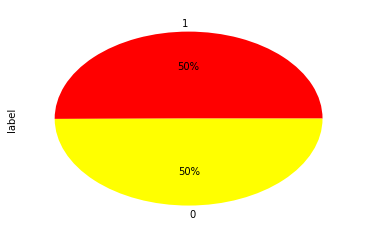

In [11]:
df.label.value_counts().plot(kind='pie',autopct='%1.0f%%', colors=["red","yellow"])

# Data Cleaning

In [12]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [13]:
processed_features

['house dem aide we didn even see comey letter until jason chaffetz tweeted it by darrell lucus on october 30 2016 subscribe jason chaffetz on the stump in american fork utah image courtesy michael jolley available under creative commons by license with apologies to keith olbermann there is no doubt who the worst person in the world is this week fbi director james comey but according to house democratic aide it looks like we also know who the second worst person is as well it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton email server the ranking democrats on the relevant committees didn hear about it from comey they found out via tweet from one of the republican committee chairmen as we now know comey notified the republican chairmen and democratic ranking members of the house intelligence judiciary and oversight committees that his agency was reviewing emails it had recently discovered in o

# #Applying vectorization  TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
model=TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = model.fit_transform(processed_features).toarray()

# Dividing Data into Training and Test Sets

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(processed_features, labels, test_size=0.2, random_state=10)

In [29]:
model.get_feature_names()[:100]

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '200',
 '2000',
 '2001',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '35',
 '40',
 '400',
 '45',
 '50',
 '500',
 '60',
 '70',
 '80',
 '90',
 '_____',
 'abc',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'abuse',
 'academy',
 'accept',
 'accepted',
 'access',
 'according',
 'account',
 'accounts',
 'accusations',
 'accused',
 'acknowledged',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'acts',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'admitted',
 'advance',
 'advanced',
 'advantage',
 'advice',
 'adviser',
 'advisers']

In [17]:
model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 2500,
 'min_df': 7,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',


# Training the Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Making Predictions and Evaluating the Model

In [19]:
predictions =text_classifier.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 

In [21]:
print(confusion_matrix(y_test, predictions))

[[1980  110]
 [ 103 1967]]


In [22]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      2090
          1       0.95      0.95      0.95      2070

avg / total       0.95      0.95      0.95      4160



In [23]:
print(accuracy_score(y_test, predictions))

0.9487980769230769


In [24]:
import numpy as np
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


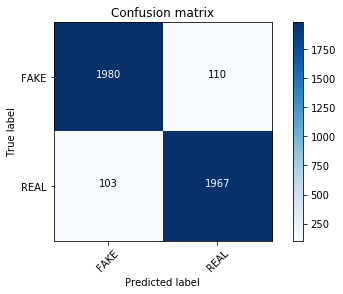

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), classes=['FAKE','REAL'])

# wordcloud function

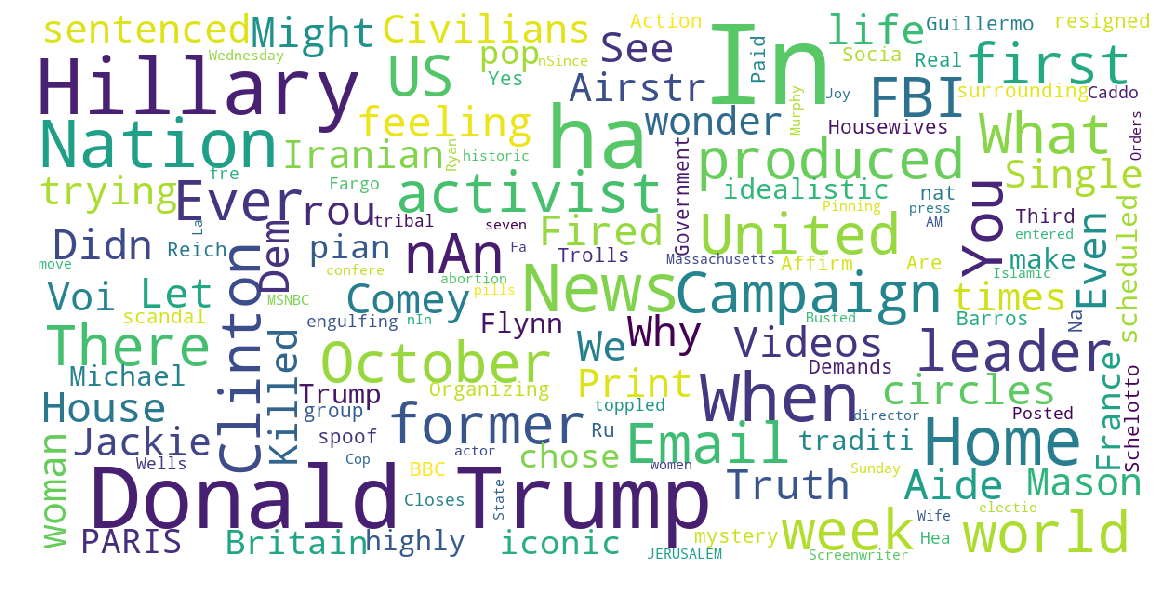

In [13]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["text"])